Basic Random forest implementation for customer upselling


In [77]:
#import required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

Analyzing input data

In [78]:
# reading data set into pandas
Data_df =  pd.read_csv("C:\\Users\\Abhi\\Desktop\\data-full.csv", sep=";")

Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Basic data exploration

In [79]:
Data_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [80]:
# Rows, columns
Data_df.shape

(41188, 21)

In [81]:
Data_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [82]:
# recode reponse variable into 1/0 using pandas factorize
Data_df_ = Data_df
Data_df_['TARGET'] = pd.factorize(Data_df_['y'])[0]
Data_df_ = Data_df_.drop('y', 1)

# Apply one-hot coding for categorical features job, marital, education, default, housing, load, contact, month, day_of_week, poutcome

Data_df_1 = pd.get_dummies(Data_df_, dummy_na=True)

Data_df_1.columns



Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'TARGET',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'job_nan', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'marital_nan', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'education_nan',
       'default_no', 'default_unknown', 'default_yes', 'default_nan',
       'housing_no', 'housing_unknown', 'housing_yes', 'housing_nan',
       'loan_no', 'loan_unknown', 'loan_yes', 'loan_nan', 'contact_cellular',
       'contact_telephone', 'contact_nan', 'mo

Train/Test split

In [83]:
training_sample1, testing_sample1 = train_test_split(Data_df_1, test_size=0.3, random_state=42)
print("Training data set size = ",len(training_sample1) )
print("Testing data set size =",len(testing_sample1) )

Training data set size =  28831
Testing data set size = 12357


Divide and separate the Target variable and the input variables.Remove the target variable from the data set.

In [84]:
train_labels = np.array(training_sample1['TARGET'])
train_features = training_sample1.drop('TARGET', axis=1)
training_sample1 = train_features
train_feature_list = list(train_features.columns)
train_features = np.array(train_features)
test_labels = np.array(testing_sample1['TARGET'])
test_features = np.array(testing_sample1.drop('TARGET', axis=1))

Instantiate Random forest with 50 decision trees

In [86]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf.fit(train_features, train_labels);


Properties of the created model

In [87]:
print(rf.estimators_)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('Number of classes')

print(rf.n_classes_)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('Class labels')

print(rf.classes_)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('Number of features when fit is perform')

print(rf.n_features_)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('Number of outputs when fit is performed')

print(rf.n_outputs_)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('Feature Importance')

print(rf.feature_importances_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1608637542, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1273642419, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le

Evaluate the model using tenfold cross validation 

In [88]:
accuracy = cross_validate(rf, test_features, test_labels, cv=10)['test_score']
print('The accuracy is: ',sum(accuracy)/len(accuracy)*100,'%')

The accuracy is:  91.00104692394183 %


ROC chart

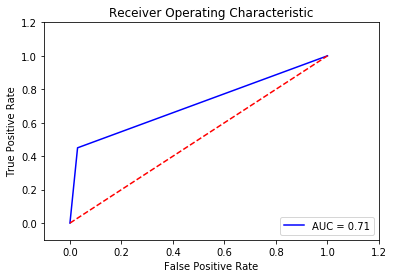

In [106]:
pred=rf.predict(test_features)
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(test_labels, pred)
roc_auc =  metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Attribute Importance Chart

Text(0.5,1,'Variable Importances')

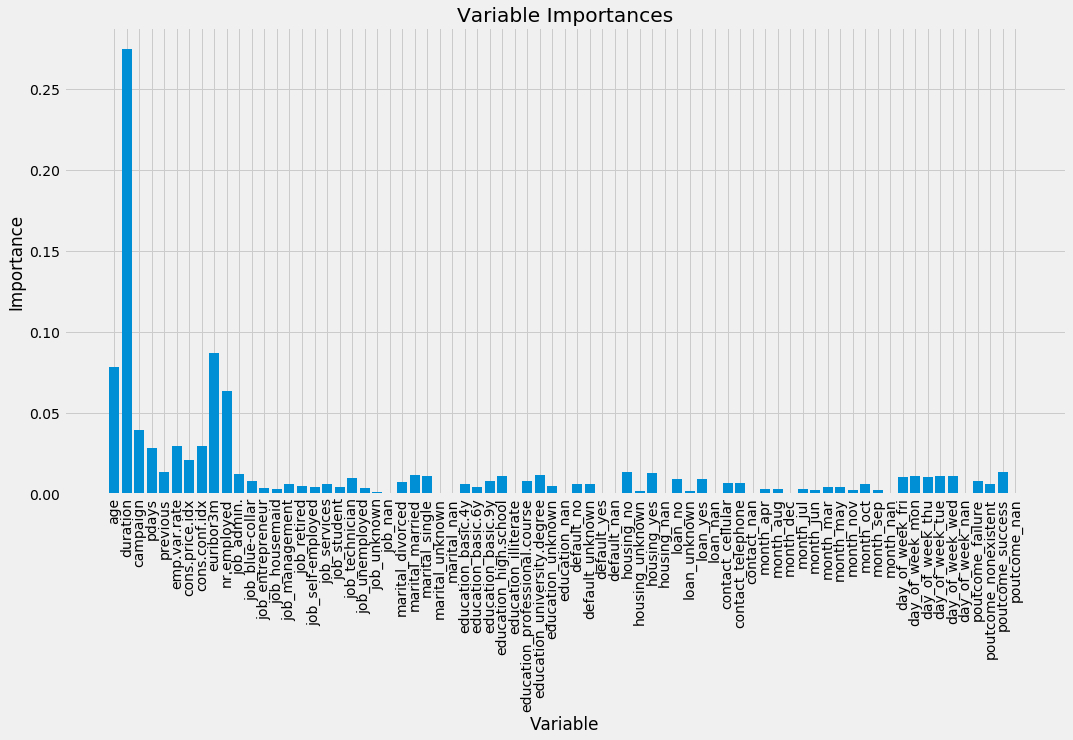

In [109]:
# numerical feature importances
imp = list(rf.feature_importances_)

# style setting
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))

# x locations for plotting
values_x = list(range(len(imp)))

# Bar chart
plt.bar(values_x, imp, orientation = 'vertical')

# Tick  x axis labels 
plt.xticks(values_x, train_feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')